In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import special

In [11]:
#df=pd.read_csv("results/simulation_results.csv")
#df=pd.read_csv("results/simulation_results_8x16_10_06_23.csv")
df=pd.read_csv("results/simulation_results_12x24_10_06_23.csv")
#df=pd.read_csv("results/simulation_results_16x32_10_06_23.csv")
#df=pd.read_csv("results/simulation_results_hasenfratz_05_31_23.csv")
#df=pd.read_csv("results/old2/simulation_results_12x24_04-24-23.csv")
#df2=pd.read_csv("results/old2/simulation_results_8x16_04-24-23.csv")
#df2=pd.read_csv("results/old2/simulation_results_16x32_alpha_0.001_06-20-23.csv")
#df2=pd.read_csv("results/old/simulation_results_lambda_1000_to_10000_03_13_23.csv")
#df=pd.read_csv("results/old/simulation_results_lmbd_1000_ms_202-203_03_13_2023.csv")#

Text(0.5, 0.98, '$\\langle \\sigma \\rangle$ vs $\\alpha$')

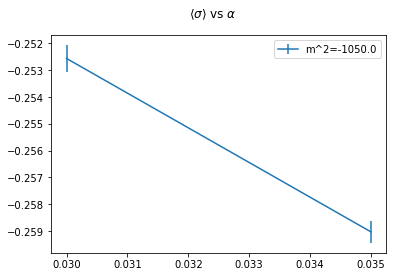

In [ ]:
fig,ax = plt.subplots()

lmbd = 10000.0
lattice_size = '8x8x8x16'
#lattice_size = '12x12x12x24'

a=df.loc[(df['lattice size']==lattice_size) & (df['lambda']==lmbd) & (df['m^2']==-round(0.105*lmbd,3))].sort_values('alpha')
ax.errorbar(y=a['sigma vev'][:-2], x=a['alpha'][:-2], yerr=a['sigma vev error'][:-2], label=f'm^2={-round(0.105*lmbd,2)}')

ax.legend()
fig.suptitle(f"$\\langle \\sigma \\rangle$ vs $\\alpha$")
#fig.savefig("results/parameter_space_analysis/lambda_100_alpha_dep.png")
#ax.set_xscale('log')

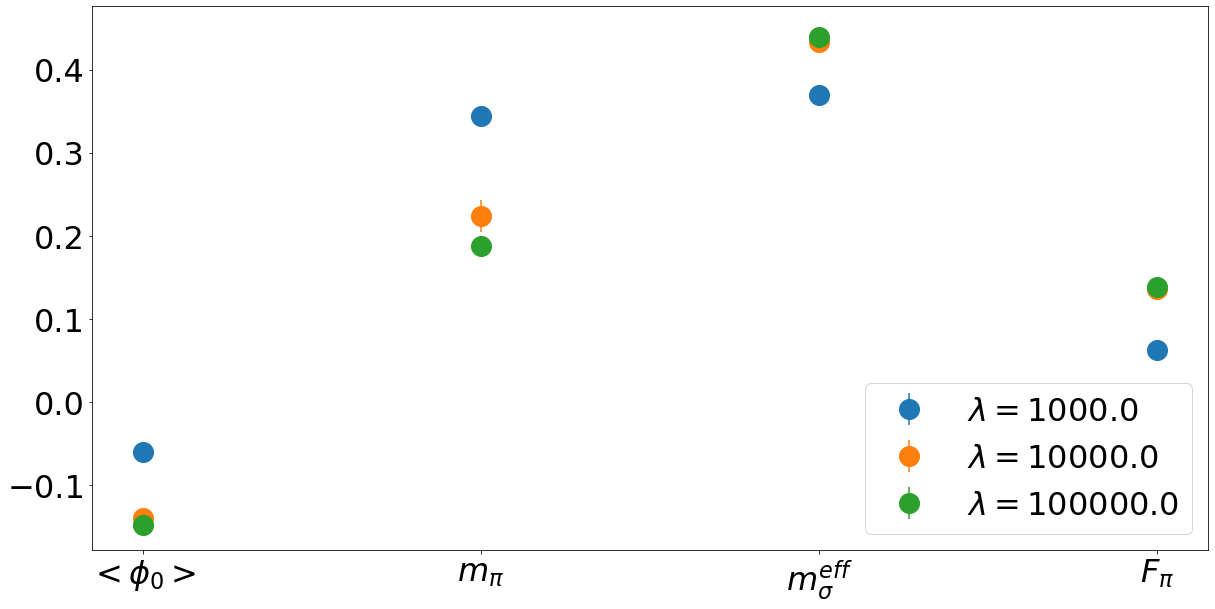

In [20]:
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 32}
plt.rc('font', **font)

fig,ax = plt.subplots()
fig.set_figwidth(20)
fig.set_figheight(10)

#lattice_size="8x8x8x16"
lattice_size="16x16x16x32"
msq_ratio = 0.102
alpha = 0.007

lmbd = 1000.0
a=df.loc[(df['lattice size']==lattice_size) & (df['lambda']==lmbd) & (df['m^2']==-round(msq_ratio*lmbd,3)) & (df['alpha']==alpha)]
ax.errorbar(x=["$<\phi_0>$", "$m_\pi$", "$m_\sigma^{eff}$", "$F_\pi$"], 
            y=[a['sigma vev'].to_list()[0], a['pion mass'].to_list()[0], a['sigma effective mass'].to_list()[0], a['fpi'].to_list()[0]], 
            yerr=[a['sigma vev error'].to_list()[0], a['pion mass error'].to_list()[0], a['sigma effective mass error'].to_list()[0], a['fpi error'].to_list()[0]], 
            label=f'$\lambda={lmbd}$', fmt='o', ms=20)

lmbd = 10000.0
a=df.loc[(df['lattice size']==lattice_size) & (df['lambda']==lmbd) & (df['m^2']==-round(msq_ratio*lmbd,3)) & (df['alpha']==alpha)]
ax.errorbar(x=["$<\phi_0>$", "$m_\pi$", "$m_\sigma^{eff}$", "$F_\pi$"], 
            y=[a['sigma vev'].to_list()[0], a['pion mass'].to_list()[0], a['sigma effective mass'].to_list()[0], a['fpi'].to_list()[0]], 
            yerr=[a['sigma vev error'].to_list()[0], a['pion mass error'].to_list()[0], a['sigma effective mass error'].to_list()[0], a['fpi error'].to_list()[0]], 
            label=f'$\lambda={lmbd}$', fmt='o', ms=20)

lmbd = 100000.0
a=df.loc[(df['lattice size']==lattice_size) & (df['lambda']==lmbd) & (df['m^2']==-round(msq_ratio*lmbd,3)) & (df['alpha']==alpha)]
ax.errorbar(x=["$<\phi_0>$", "$m_\pi$", "$m_\sigma^{eff}$", "$F_\pi$"], 
            y=[a['sigma vev'].to_list()[0], a['pion mass'].to_list()[0], a['sigma effective mass'].to_list()[0], a['fpi'].to_list()[0]], 
            yerr=[a['sigma vev error'].to_list()[0], a['pion mass error'].to_list()[0], a['sigma effective mass error'].to_list()[0], a['fpi error'].to_list()[0]], 
            label=f'$\lambda={lmbd}$', fmt='o', ms=20)

ax.legend()
#fig.suptitle(f"Observables at physical point for various $\lambda$ ({lattice_size})")

fig.savefig("lambda_comparison.png",facecolor=(1, 1, 1))

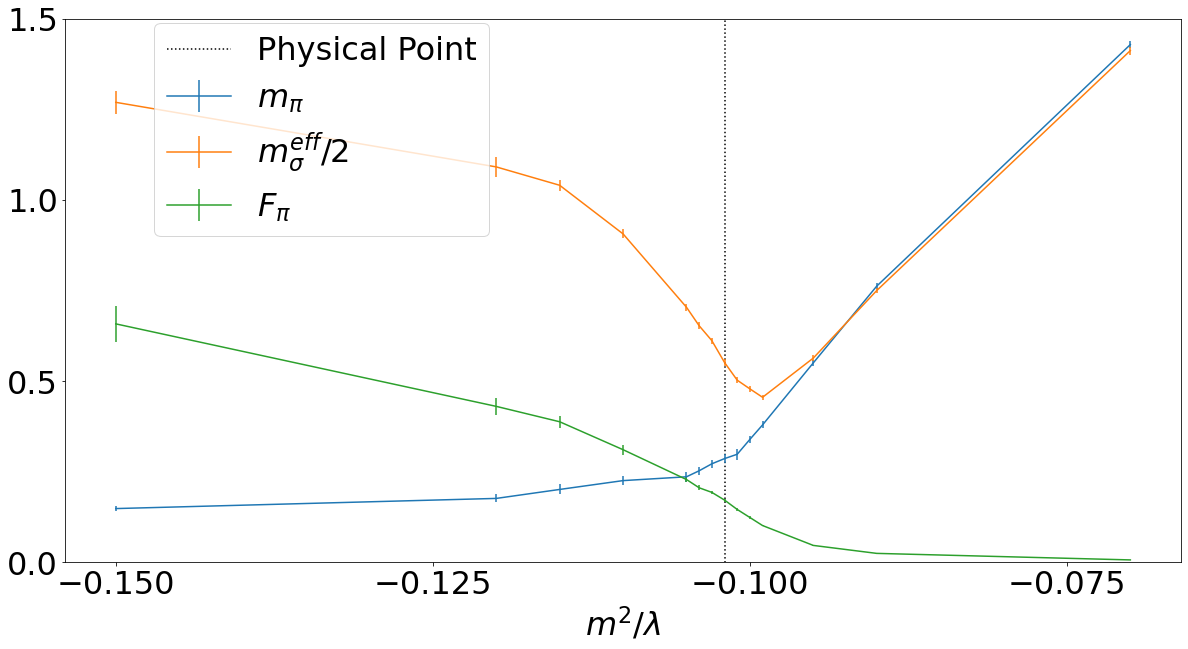

In [13]:
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 32}
plt.rc('font', **font)

fig,ax = plt.subplots()
fig.set_figwidth(20)
fig.set_figheight(10)

lmbd = 10000.0
alpha = 0.015
ax.vlines(x=-0.102, ymin=-1, ymax=2, color='black', linestyle='dotted', label='Physical Point')

lattice_size='16x16x16x32'
lattice_size='8x8x8x16'
lattice_size='12x12x12x24'
#lattice_size='24x24x24x48'

start=2
end=1000
a = df.loc[(df['lattice size']==lattice_size) & (df['lambda']==lmbd) & (df['alpha']==alpha)].sort_values('m^2')
#print(a['pion mass'][start:].abs())
ax.errorbar(a['m^2'][start:end]/lmbd, a['pion mass'][start:end].abs(), yerr=a['pion mass error'][start:end], label='$m_\pi$')
sigma_fact = 1
a = df.loc[(df['lattice size']==lattice_size) & (df['lambda']==lmbd) & (df['alpha']==alpha)].sort_values('m^2')
ax.errorbar(a['m^2'][start:end]/lmbd, a['sigma effective mass'][start:end].abs()*sigma_fact, yerr=a['sigma effective mass error'][start:end]*sigma_fact, label='$m_\sigma^{eff}/2$')
a = df.loc[(df['lattice size']==lattice_size) & (df['lambda']==lmbd) & (df['alpha']==alpha)].sort_values('m^2')
ax.errorbar(a['m^2'][start:end]/lmbd, a['fpi'][start:end].abs(), yerr=a['fpi error'][start:end], label='$F_\pi$')
#print(a['fpi'][start:].abs())

a = df.loc[(df['lattice size']==lattice_size) & (df['lambda']==lmbd) & (df['alpha']==alpha)].sort_values('m^2')
#ax.errorbar(a['m^2'][start:end]/lmbd, a['fpi2'][start:end].abs(), yerr=a['fpi2 error'][start:end], label='$F_\pi$ (pion corrs)')

#ax.legend()
ax.legend(loc=[0.08,0.6])
#ax.set_xlim([-0.107,-0.099])
ax.set_ylim([0.0,1.5])
ax.locator_params(nbins=4)

ax.set_xlabel("$m^2/\lambda$")

#fig.suptitle(fr"Parameters vs $m^2/\lambda$ for {lattice_size}, $\lambda$={lmbd}, $\alpha$={alpha}")
fig.savefig("msq_plot.png",facecolor=(1, 1, 1))

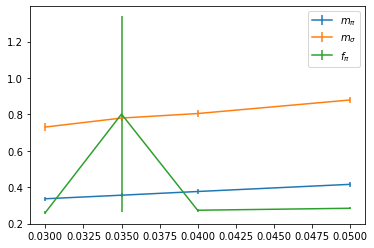

In [ ]:
fig,ax = plt.subplots()

lmbd = 10000.0
msq = -0.105*lmbd

lattice_size='8x8x8x16'
#lattice_size='12x12x12x24'

start=0
a = df.loc[(df['lattice size']==lattice_size) & (df['lambda']==lmbd) & (df['m^2']==msq)].sort_values('alpha')
ax.errorbar(a['alpha'][start:], a['pion mass'][start:].abs(), yerr=a['pion mass error'][start:], label='$m_\pi$')
a = df.loc[(df['lattice size']==lattice_size) & (df['lambda']==lmbd) & (df['m^2']==msq)].sort_values('alpha')
ax.errorbar(a['alpha'][start:], a['sigma mass'][start:].abs(), yerr=a['sigma mass error'][start:], label='$m_\sigma$')
a = df.loc[(df['lattice size']==lattice_size) & (df['lambda']==lmbd) & (df['m^2']==msq)].sort_values('alpha')
ax.errorbar(a['alpha'][start:], a['fpi'][start:].abs(), yerr=a['fpi error'][start:], label='$f_\pi$')

ax.legend()

# Hasenfratz Epsilon-Expansion Fit

Text(0.5, 0.98, '$\\langle \\sigma \\rangle$ vs $\\alpha$')

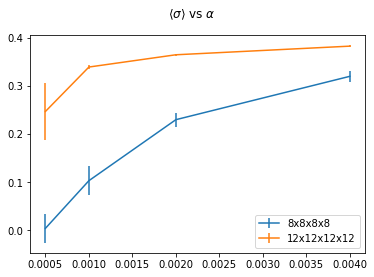

In [ ]:
fig,ax = plt.subplots()

lmbd = 10000.0
m_sq_ratio = 0.118

lattice_size = '8x8x8x8'
a=df.loc[(df['lattice size']==lattice_size) & (df['lambda']==lmbd) & (df['m^2']==-round(m_sq_ratio*lmbd,3))].sort_values('alpha')
ax.errorbar(y=np.abs(a['sigma vev'][:]), x=a['alpha'][:], yerr=a['sigma vev error'][:], label=f'{lattice_size}')

lattice_size = '12x12x12x12'
a=df.loc[(df['lattice size']==lattice_size) & (df['lambda']==lmbd) & (df['m^2']==-round(m_sq_ratio*lmbd,3))].sort_values('alpha')
ax.errorbar(y=np.abs(a['sigma vev'][:]), x=a['alpha'][:], yerr=a['sigma vev error'][:], label=f'{lattice_size}')

ax.legend()
fig.suptitle(f"$\\langle \\sigma \\rangle$ vs $\\alpha$")
#fig.savefig("results/parameter_space_analysis/lambda_100_alpha_dep.png")
#ax.set_xscale('log')

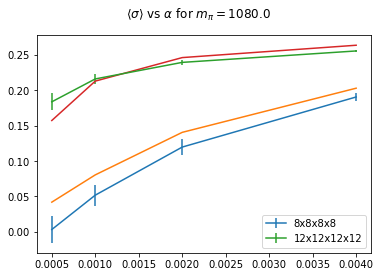

In [ ]:
r = 0.2107
bessel_ratio = lambda x: special.ive(2, x) / special.ive(1, x)
u = lambda alpha, sigma0, F, L: sigma0*alpha*(L**4+r*L**2/F**2)
sigma_model = lambda alpha, sigma0, F, L: sigma0*(1+r/F**2/L**2)*bessel_ratio(u(alpha,sigma0,F,L))

fig,ax = plt.subplots()

lmbd = 10000.0

m_sq_ratio = 0.118
F=0.41
sigma0=0.403

#m_sq_ratio = 0.110
#sigma0=0.303
#F=sigma0

m_sq_ratio = 0.108
sigma0=0.276
F=sigma0

lattice_size = '8x8x8x8'
a=df.loc[(df['lattice size']==lattice_size) & (df['lambda']==lmbd) & (df['m^2']==-round(m_sq_ratio*lmbd,3))].sort_values('alpha')
ax.errorbar(y=np.abs(a['sigma vev'][:]), x=a['alpha'][:], yerr=a['sigma vev error'][:], label=f'{lattice_size}')
ax.plot(a['alpha'][:], sigma_model(a['alpha'][:], sigma0, F, 8))

lattice_size = '12x12x12x12'
a=df.loc[(df['lattice size']==lattice_size) & (df['lambda']==lmbd) & (df['m^2']==-round(m_sq_ratio*lmbd,3))].sort_values('alpha')
ax.errorbar(y=np.abs(a['sigma vev'][:]), x=a['alpha'][:], yerr=a['sigma vev error'][:], label=f'{lattice_size}')
ax.plot(a['alpha'][:], sigma_model(a['alpha'][:], sigma0, F, 12))


ax.legend()
fig.suptitle(f"$\\langle \\sigma \\rangle$ vs $\\alpha$ for $m_\pi={lmbd*m_sq_ratio}$")
fig.savefig("has_compare_108.png")